In [1]:
import re
import csv
import matplotlib.pyplot as plt

# Define the regular expressions to capture the losses
train_loss_pattern = re.compile(r'Step (\d+) stats, train: loss = ([\d\.]+)')
val_loss_pattern = re.compile(r'Step (\d+) stats, val: loss = ([\d\.]+)')

# Initialize dictionaries to hold the losses
train_losses = {}
val_losses = {}

In [ ]:
# Read the log file
with open('log.txt', 'r') as file:
    lines = file.readlines()

In [2]:
# Process each line in the log file
for line in lines:
    train_match = train_loss_pattern.search(line)
    val_match = val_loss_pattern.search(line)
    
    if train_match:
        step = int(train_match.group(1))
        loss = float(train_match.group(2))
        train_losses[step] = loss
    
    if val_match:
        step = int(val_match.group(1))
        loss = float(val_match.group(2))
        val_losses[step] = loss

In [9]:
# Sort the dictionaries based on keys
train_losses = dict(sorted(train_losses.items()))
val_losses = dict(sorted(val_losses.items()))

In [10]:
# Plot the losses
train_steps = list(train_losses.keys())
train_loss_values = list(train_losses.values())
val_steps = list(val_losses.keys())
val_loss_values = list(val_losses.values())

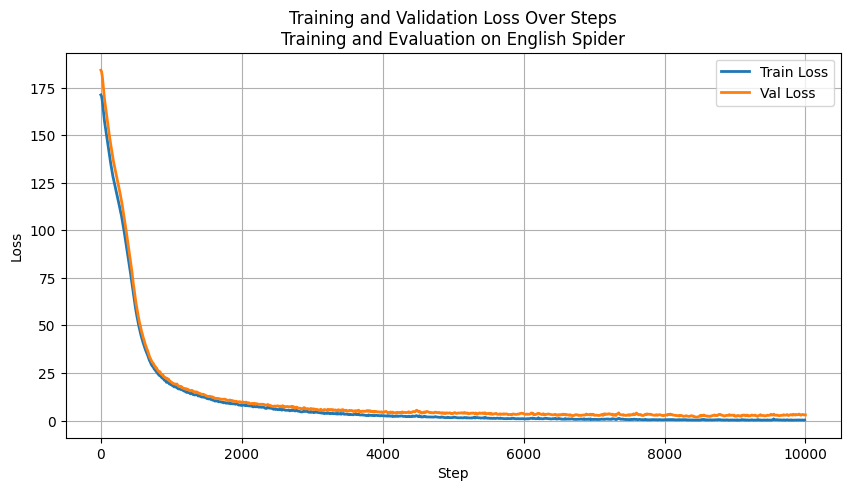

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_loss_values, label='Train Loss', linewidth=2)
plt.plot(val_steps, val_loss_values, label='Val Loss', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Steps\nTraining and Evaluation on English Spider',loc='center')
plt.legend()
plt.grid(True)
#plt.savefig('loss_plot.png')
plt.show()